
### Formulation du Problème :

Étant donné un ensemble de données $ \{(x^{(i)}, y^{(i)})\} $, où $ x^{(i)} $ est un vecteur d'entrée à 2 dimensions et $ y^{(i)} $ est la sortie cible correspondante, notre objectif est de trouver les paramètres optimaux $ w $ et $ b $ pour le modèle de réseau neuronal $ y = wx + b $ en minimisant une fonction de perte choisie $ L(y, y^{(i)}) $.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# Générer des données aléatoires
np.random.seed(42)
num_samples = 1000
input_size = 2

# Générer des données d'entrée aléatoires
X = np.random.rand(num_samples, input_size)

# Générer des poids réels aléatoires et un biais pour le neurone
vrais_poids = np.random.rand(input_size)
vrai_biais = np.random.rand()

# Générer des étiquettes en utilisant les vrais poids et le biais avec un peu de bruit aléatoire
bruit = np.random.randn(num_samples) * 0.1  # Ajout de bruit aux étiquettes
y = np.dot(X, vrais_poids) + vrai_biais + bruit

In [2]:
print('W', vrais_poids)
print('b', vrai_biais)

W [0.26170568 0.2469788 ]
b 0.9062545805210367


In [3]:
X=torch.from_numpy(X).cuda().float()
y=torch.from_numpy(y).cuda().float()


### Équation de Propagation Avant (Feed Forward) :

L'équation de propagation avant pour le réseau neuronal est :

$$ y = wx + b $$

Où :
- $ y $ est la sortie prédite.
- $ x $ est le vecteur d'entrée de taille 2.
- $ w $ est le vecteur de poids de même taille que $ x $.
- $ b $ est le terme de biais.

In [4]:
# Configuration du périphérique (GPU)
device = torch.device('cuda')
# Initialiser les poids et le biais avec des valeurs aléatoires

weights = torch.rand(input_size, requires_grad=True).float().cuda()
bias = torch.rand(1, requires_grad=True).float().cuda()

print((torch.mm(X, weights.view(-1, 1)) + bias))#.detach().cpu().numpy()

tensor([[0.7672],
        [0.8628],
        [0.5916],
        [0.6366],
        [0.8256],
        [0.6343],
        [0.8563],
        [0.6047],
        [0.6910],
        [0.7126],
        [0.7637],
        [0.6680],
        [0.7791],
        [0.6498],
        [0.7455],
        [0.7656],
        [0.6489],
        [0.9763],
        [0.6416],
        [0.8262],
        [0.6180],
        [0.6326],
        [0.6896],
        [0.6933],
        [0.7441],
        [0.9740],
        [0.9764],
        [0.8491],
        [0.5705],
        [0.5690],
        [0.6938],
        [0.8717],
        [0.6842],
        [0.6608],
        [0.6569],
        [0.8318],
        [0.6107],
        [0.8683],
        [0.8169],
        [0.6642],
        [0.9157],
        [0.6476],
        [0.6704],
        [0.8664],
        [0.9074],
        [0.6424],
        [0.8695],
        [0.8655],
        [0.7631],
        [0.5362],
        [0.5998],
        [0.6930],
        [0.8893],
        [0.7583],
        [0.6102],
        [0




### Formule de Descente de Gradient :

Pour optimiser les paramètres $ w $ et $ b $, nous utilisons la descente de gradient. La formule de mise à jour par descente de gradient pour les paramètres est :

$$ w := w - \alpha \cdot \frac{\partial L}{\partial w} $$
$$ b := b - \alpha \cdot \frac{\partial L}{\partial b} $$

Où :
- $ \alpha $ est le taux d'apprentissage.
- $ \frac{\partial L}{\partial w} $ et $ \frac{\partial L}{\partial b} $ sont les gradients de la fonction de perte $ L $ par rapport à $ w $ et $ b $ respectivement.

### Algorithme de Mise à Jour :

1. Initialiser les poids $ w $ et le biais $ b $ avec des valeurs aléatoires.
2. Parcourir l'ensemble de données $ \{(x^{(i)}, y^{(i)})\} $ en mini-lots ou dans son intégralité.
3. Pour chaque échantillon :
   - Calculer la sortie prédite $ y = wx + b $.
   - Calculer la perte $ L(y, y^{(i)}) $ entre la sortie prédite et la sortie réelle.
   - Calculer les gradients :
     $$ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w} $$
     $$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b} $$
   - Mettre à jour les poids et le biais en utilisant la descente de gradient :
     $$ w := w - \alpha \cdot \frac{\partial L}{\partial w} $$
     $$ b := b - \alpha \cdot \frac{\partial L}{\partial b} $$
4. Répéter les itérations jusqu'à la convergence ou un nombre défini d'époques.

### Calcul des Gradients avec MSE :

Les gradients pour la fonction de perte MSE ($ L $) par rapport à $ w $ et $ b $ sont les suivants :

$$ \frac{\partial L}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y^{(i)}) \cdot x $$
$$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y^{(i)}) \cdot 1 $$

Où $ N $ est le nombre d'échantillons, $ \hat{y} $ est la sortie prédite, $ y^{(i)} $ est la sortie réelle, et $ x $ est le vecteur d'entrée. Ces gradients peuvent être utilisés dans la règle de mise à jour par descente de gradient pour entraîner le réseau neuronal.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Époque 0, Perte : 0.19287540018558502
Époque 100, Perte : 0.023464417085051537
Époque 200, Perte : 0.021111706271767616
Époque 300, Perte : 0.020874550566077232
Époque 400, Perte : 0.02084970287978649
Époque 500, Perte : 0.02084706723690033
Époque 600, Perte : 0.020846785977482796
Époque 700, Perte : 0.020846758037805557
Époque 800, Perte : 0.02084675244987011
Époque 900, Perte : 0.02084675244987011


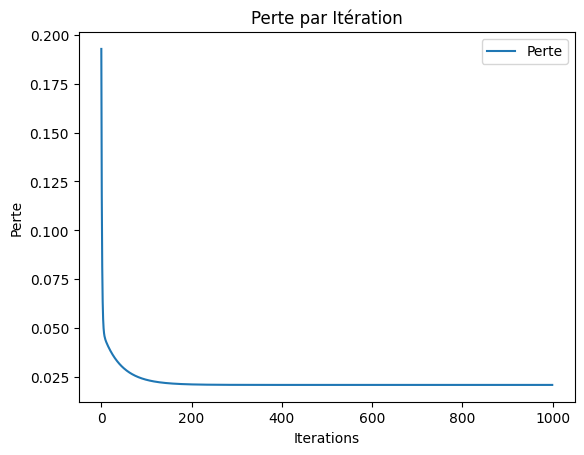

Poids Réels : [0.26170568 0.2469788 ], Biais Réel : 0.9062545805210367
Poids Appris : [4.268192e-06 5.780755e-06], Biais Appris : [1.1569526]


In [5]:

# Hyperparamètres
taux_apprentissage = 0.1
epochs = 1000

# Fonction de perte
criterion = nn.MSELoss()

# Stocker les pertes
losses = []

# Boucle d'entraînement
for epoch in range(epochs):
    # Propagation avant
    sortie_predite = torch.mm(X, weights.view(-1, 1)) + bias

    # Calcul de la perte
    loss = criterion(sortie_predite, y)
    losses.append(loss.item())

    # Rétropropagation et optimisation
    loss.backward()
    with torch.no_grad():
        weights -= taux_apprentissage * weights.grad
        bias -= taux_apprentissage * bias.grad

        # Réinitialisation des gradients
        weights.grad.zero_()
        bias.grad.zero_()

    if epoch % 100 == 0:
        print(f"Époque {epoch}, Perte : {loss.item()}")

# Tracé de la perte
plt.plot(range(epochs), losses, label='Perte')
plt.xlabel('Iterations')
plt.ylabel('Perte')
plt.title('Perte par Itération')
plt.legend()
plt.show()

# Conversion des tenseurs en tableaux numpy pour l'affichage
weights = weights.detach().cpu().numpy()
bias = bias.detach().cpu().numpy()


print(f"Poids Réels : {vrais_poids}, Biais Réel : {vrai_biais}")
print(f"Poids Appris : {weights}, Biais Appris : {bias}")
